In [66]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from matplotlib.animation import FuncAnimation

In [67]:
dx = 2e-2
dt = 1e-2
C =  dt/dx
t_anim =10
x = np.arange(0,2+dx,dx)
t = np.arange(0,t_anim+dt,dt)
u = np.zeros((int(t_anim/dt)+2,int(2/dx)+1))

In [68]:
for i in range(len(u[0])):
    u[0:2,i] = np.exp(-125*(i*dx-1/2)**2)

In [69]:
@njit("f8[:,:](f8[:,:],f8)")
def dirichlet(u_dir,C):
    ver = len(u_dir[0])
    hor = len(u_dir[:,0])
    for n in range(2,hor):
        for j in range(1,ver-1):
            u_dir[n,j] =  2*u_dir[n-1,j]-u_dir[n-2,j] + (u_dir[n-1,j+1]-2*u_dir[n-1,j]+u_dir[n-1,j-1])*C**2
    return u_dir

In [70]:
u_dir = np.copy(u)
u_dir[0:2,0] = 0
u_dir[0:2,-1] = 0
u_dir = dirichlet(u_dir,C)

In [71]:
@njit("f8[:,:](f8[:,:],f8)")
def neumann(u_neu,C):
    ver = len(u_neu[0])
    hor = len(u_neu[:,0])
    for n in range(2,hor):
        for j in range(1,ver-1):
            u_neu[n,j] =  2*u_neu[n-1,j]-u_neu[n-2,j] + (u_neu[n-1,j+1]-2*u_neu[n-1,j]+u_neu[n-1,j-1])*C**2
        u_neu[n,0] = u_neu[n,1]
        u_neu[n,-1] = u_neu[n,-2]
    return u_neu

In [72]:
u_neu = np.copy(u)
u_neu[0:2,0] = u_neu[0:2,1]
u_neu[0:2,-1] = u_neu[0:2,-2]
u_neu = neumann(u_neu,C)

In [73]:
def periodic(u_per,C):
    ver = len(u_per[0])
    hor = len(u_per[:,0])
    for n in range(2,hor):
        for j in range(1,ver-1):
            u_per[n,j] =  2*u_per[n-1,j]-u_per[n-2,j] + (u_per[n-1,j+1]-2*u_per[n-1,j]+u_per[n-1,j-1])*C**2
        u_per[n,0] = u_per[n,-2]
        u_per[n,-1] = u_per[n,1]
    return u_per

In [74]:
u_per = np.copy(u)
u_per[0:2,0] = u_per[0:2,-2]
u_per[0:2,-1] = u_per[0:2,1]
u_per = periodic(u_per,C)

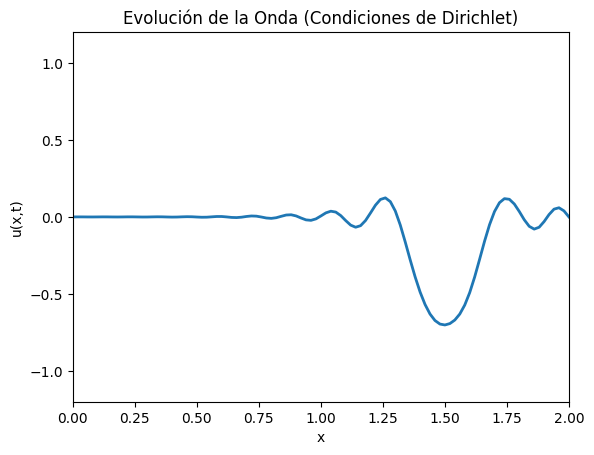

In [76]:
fig, ax = plt.subplots()
ax.set_xlim(0, 2)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel("x")
ax.set_ylabel("u(x,t)")
ax.set_title("Evolución de la Onda (Condiciones de Dirichlet)")
line, = ax.plot(x, u_dir[0, :], lw=2)  # Línea de la onda

# Función de actualización de la animación
def update(frame):
    line.set_ydata(u_dir[frame, :])  # Actualizar la onda
    return line,

# Crear la animación
ani = FuncAnimation(fig, update, frames=len(t)
                    , interval=20, blit=True)

# Mostrar la animación
ani.save("ondaDirichlet.gif", writer="pillow")